Import necessary libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import numpy as np

Load CIFAR-10 dataset for simplicity

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reduce the number of training and testing images to save memory
x_train_small = x_train[:1000]  # Take only 1000 images for training
y_train_small = y_train[:1000]
x_test_small = x_test[:500]  # Take only 500 images for testing
y_test_small = y_test[:500]

# Normalize pixel values to be between 0 and 1
x_train_small, x_test_small = x_train_small / 255.0, x_test_small / 255.0

# Function to preprocess images in batches to avoid memory issues
def preprocess_images_batchwise(x, batch_size=32, target_size=(128, 128)):  # Resize to 128x128
    resized_images = []
    for i in range(0, len(x), batch_size):
        batch = x[i:i + batch_size]
        # Resize the batch to smaller size (128x128)
        batch_resized = tf.image.resize(batch, target_size)
        resized_images.append(batch_resized)
    return np.concatenate(resized_images, axis=0)

# Preprocess the smaller dataset with resized images
x_train_resized = preprocess_images_batchwise(x_train_small, target_size=(128, 128))
x_test_resized = preprocess_images_batchwise(x_test_small, target_size=(128, 128))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


InceptionV3 (GoogleNet):

    GoogleNet uses the Inception architecture, which introduces the concept of "Inception blocks." These blocks apply multiple convolutions with different kernel sizes in parallel, allowing the model to capture multi-scale information. It also includes dimensionality reduction using 1x1 convolutions to reduce the computational cost.

    Inception layers include convolutions with 1x1, 3x3, and 5x5 kernels, along with max-pooling layers.

ResNet50:

    ResNet introduces residual connections that skip one or more layers and directly pass the output to the next layer. This approach helps to combat the vanishing gradient problem and allows for training deeper networks. The "50" in ResNet50 indicates that the model has 50 layers.

    ResNet's core building block is the "residual block," which consists of two or more convolutional layers with a skip connection that bypasses one or more layers.

Formulae:

    For convolutional layers:

    y=f(W∗x+b), where

    x is the input image,

    W is the weight matrix,

    b is the bias, and

    f is the activation function (ReLU in most cases).

    For residual connections in ResNet:

    y=f(W∗x+b)+x, where

    x is the input and the output is the sum of the transformation f(W∗x+b) and the original input x.

Define Models

In [3]:
# Define Inception V1 (GoogleNet)
def create_inceptionv1_model():
    model = tf.keras.applications.InceptionV3(input_shape=(128, 128, 3), include_top=True, weights=None, classes=10)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define ResNet50 model
def create_resnet50_model():
    model = tf.keras.applications.ResNet50(input_shape=(128, 128, 3), include_top=True, weights=None, classes=10)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Create and train the models

In [4]:
# Create and train GoogleNet (InceptionV1) model
googleNet_model = create_inceptionv1_model()
googleNet_history = googleNet_model.fit(x_train_resized, y_train_small, epochs=10, validation_data=(x_test_resized, y_test_small))

# Create and train ResNet50 model
resNet_model = create_resnet50_model()
resNet_history = resNet_model.fit(x_train_resized, y_train_small, epochs=10, validation_data=(x_test_resized, y_test_small))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.1412 - loss: 2.7361 - val_accuracy: 0.0800 - val_loss: 2.4273
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.2491 - loss: 2.1242 - val_accuracy: 0.1200 - val_loss: 2.5930
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.2736 - loss: 1.9643 - val_accuracy: 0.1020 - val_loss: 2.9999
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.2796 - loss: 1.9571 - val_accuracy: 0.1080 - val_loss: 3.3671
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.2346 - loss: 2.2226 - val_accuracy: 0.1020 - val_loss: 4554.9565
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.2209 - loss: 2.2375 - val_accuracy: 0.1040 - val_loss: 519.7867
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.2340 - loss: 2.1277 - val_accuracy: 0.0840 - val_loss: 3.7494
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.3306 - loss: 1.9178 - val_accuracy: 0.0

Visualize the model architectures

In [7]:
!# Print summary of the GoogleNet (InceptionV1) model
googleNet_model.summary()

# Print summary of the ResNet50 model
resNet_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 63, 63, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 63, 63, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 61, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 61, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 61, 61, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 61, 61, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 61, 61, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 30, 30, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 30, 30, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 30, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 30, 30, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 28, 28, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 65,400,960 (249.48 MB)

 Trainable params: 21,788,842 (83.12 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 43,577,686 (166.24 MB)

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 70,718,368 (269.77 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,110,166 (179.71 MB)

Compare training results of both models

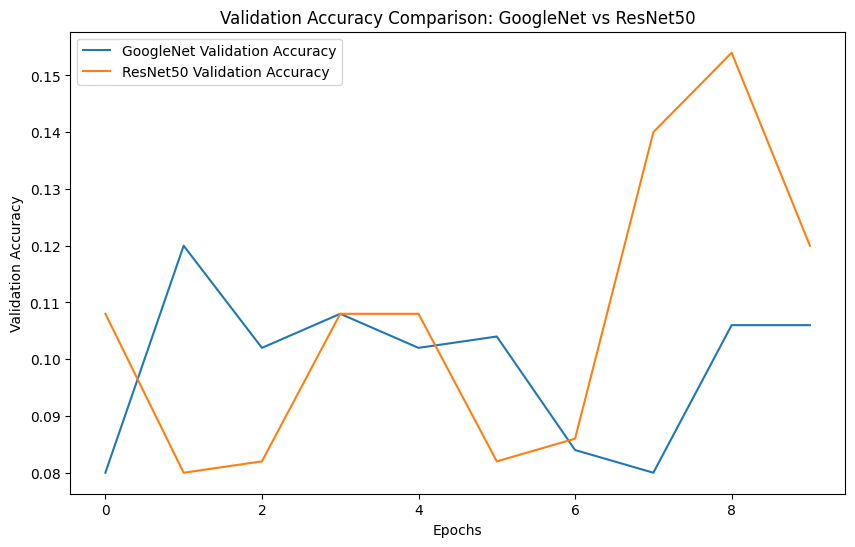

16/16 - 1s - 33ms/step - accuracy: 0.1060 - loss: 2941.6953
16/16 - 1s - 32ms/step - accuracy: 0.1200 - loss: 4.4823
GoogleNet Test Accuracy: 0.1060
ResNet50 Test Accuracy: 0.1200


In [10]:
# Plot validation accuracy for both models in a single plot
plt.figure(figsize=(10, 6))
plt.plot(googleNet_history.history['val_accuracy'], label='GoogleNet Validation Accuracy')
plt.plot(resNet_history.history['val_accuracy'], label='ResNet50 Validation Accuracy')
plt.title('Validation Accuracy Comparison: GoogleNet vs ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate both models on test data
googleNet_test_loss, googleNet_test_acc = googleNet_model.evaluate(x_test_resized, y_test_small, verbose=2)
resNet_test_loss, resNet_test_acc = resNet_model.evaluate(x_test_resized, y_test_small, verbose=2)

print(f"GoogleNet Test Accuracy: {googleNet_test_acc:.4f}")
print(f"ResNet50 Test Accuracy: {resNet_test_acc:.4f}")